<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#working to get our own dataset in Pytorch.
#one way:work on custom dataset

In [4]:
import torch
from torch import nn

In [5]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Step 1: Getting dataset from the gitHub:

In [6]:
#our dataset starts with 3 classes of image, each class haveing 100 images 75 for traning and 25 for testing...
#first on small scale then Large scale...

In [7]:
import requests
import zipfile
from pathlib import Path

#Folder where our data will be stored...
data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

#image our folder already exist..
if image_path.is_dir():
  print(f"{image_path} already exists")
else:
  print(f"{image_path} does not exist, creating one..")
  image_path.mkdir(parents=True,
                   exist_ok=True)
#downloading the zip file from the location using url:
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading Data")
  f.write(request.content)

#unzipping the downloaded file:
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("Un-Zipping the file")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one..
Un-Zipping the file


# Step 2: Becoming Familiar with data:

In [8]:
from posixpath import dirname
import os
def walk_dir_content(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}");

In [9]:
walk_dir_content(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [10]:
#classic image classification setup:
train_dir=image_path / "train"
test_dir=image_path / "test"

#Standard Image classification data format

In [11]:
print("""pizza_steak_sushi/ # <- overall dataset folder
  train/ # <- training images
    pizza/ <- class name as folder name
      image01.jpeg
      image02.jpeg
      ...
    steak/
      image24.jpeg
      image25.jpeg
      ...
    sushi/
      image37.jpeg
      ...
  test/ # <- testing images
    pizza/
      image101.jpeg
      image102.jpeg
      ...
    steak/
      image154.jpeg""")


pizza_steak_sushi/ # <- overall dataset folder
  train/ # <- training images
    pizza/ <- class name as folder name
      image01.jpeg
      image02.jpeg
      ...
    steak/
      image24.jpeg
      image25.jpeg
      ...
    sushi/
      image37.jpeg
      ...
  test/ # <- testing images
    pizza/
      image101.jpeg
      image102.jpeg
      ...
    steak/
      image154.jpeg


In [12]:
print(train_dir,test_dir)

data/pizza_steak_sushi/train data/pizza_steak_sushi/test


In [13]:
# Let's write some code to:
# 1. Get all of the image paths
# 2. Pick a random image path using Python's random.choice()
# 3. Get the image class name using pathlib.Path.parent.stem
# 4. Since we're working with images, let's open the image with Python's PIL
# 5. We'll then show the image and print metadata



Random Image: data/pizza_steak_sushi/test/pizza/930553.jpg
Image Classname: pizza
Image Height: 512
Image Width: 306


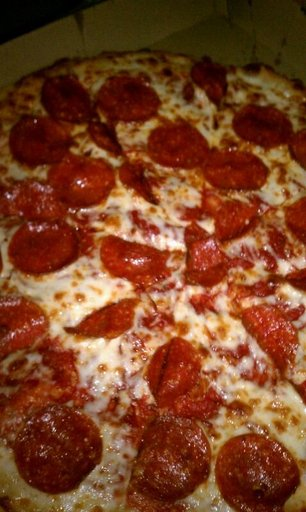

In [29]:
import random
random.seed(42)
from PIL import Image

#1.Get all the image path:
image_path_list=list(image_path.glob("*/*/*.jpg"))

#2.Getting a random image:
image_random=random.choice(image_path_list)

#3.Getting the image class from the path name:
image_class_name=image_random.parent.stem

#4.Opening the random selected image:
img=Image.open(image_random)

#5.print the metadata:
print(f"Random Image: {image_random}")
print(f"Image Classname: {image_class_name}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

(np.float64(-0.5), np.float64(305.5), np.float64(511.5), np.float64(-0.5))

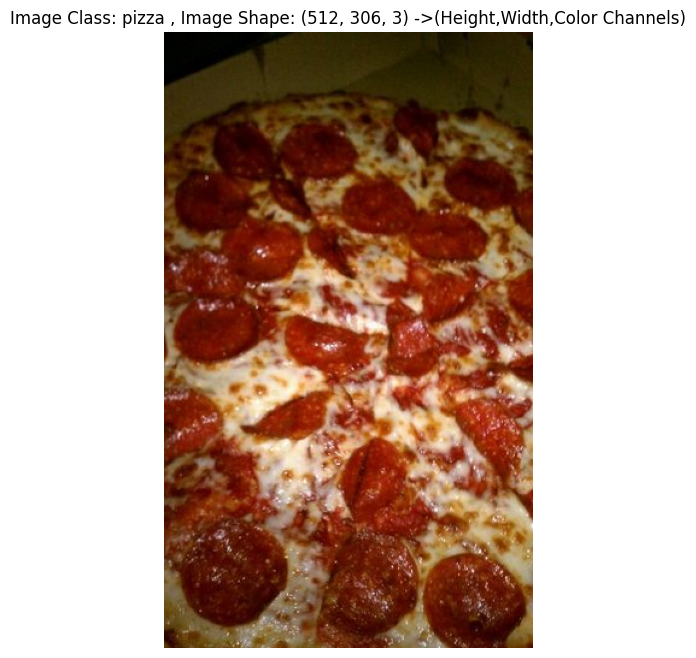

In [15]:
#Visualizing using matplotlib
import numpy as np
import matplotlib.pyplot as plt
image_array=np.asarray(img)
plt.figure(figsize=(10,8))
plt.imshow(image_array)
plt.title(f"Image Class: {image_class_name} , Image Shape: {image_array.shape} ->(Height,Width,Color Channels)")
plt.axis("off")

#Step 3: Turning Images to Tensors:

In [35]:
#Building A transformer Pipeline To transform our images:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
Data_transform=transforms.Compose([
    #Resizing the image:
    transforms.Resize(size=(64,64)),
    #Fliping the image horizontally randomly:
    transforms.RandomHorizontalFlip(p=0.5),
    #Transforming image to tensor:
    transforms.ToTensor()
])
Data_transform(img)
print(Data_transform(img).shape)
print(Data_transform(img).dtype)

torch.Size([3, 64, 64])
torch.float32


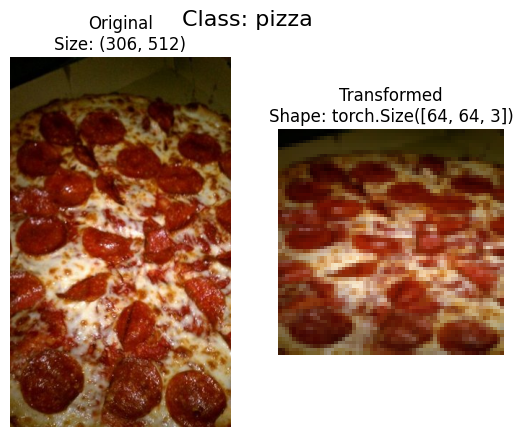

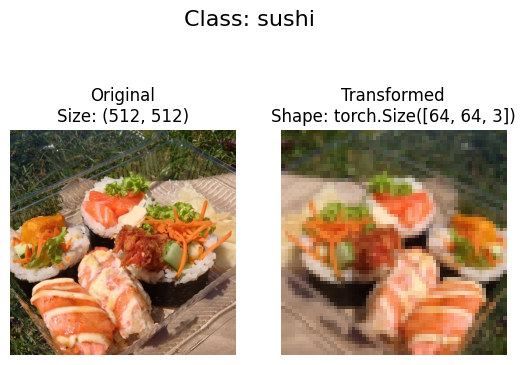

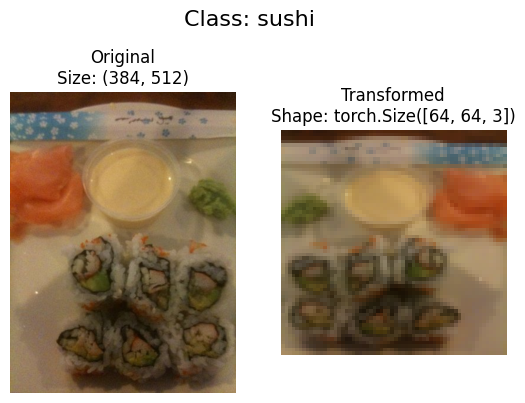

In [38]:
#visualize visualize visualize....
def image_transformer_visualizer(image_paths:list,
                                 transform,
                                 n=3,
                                 seed=None):
  if seed:
    random.seed(seed)
  random_image_path=random.sample(image_paths,k=n)
  for image in random_image_path:
    with Image.open(image) as f:
      fig, ax=plt.subplots(nrows=1,ncols=2)
      #plotting original image:
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")
      #plotting transformed image:
      transformed_image=transform(f).permute(1,2,0) #making change to the shape so as to satisfy matplotlib default image format...
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      class_name = image.parent.stem
      fig.suptitle(f"Class: {class_name}", fontsize=16)
      plt.show()

image_transformer_visualizer(image_paths=image_path_list,
                             transform=Data_transform,
                             n=3,
                             seed=42)

**ImageFolder = organizes & labels data**

---


**DataLoader = feeds data in batches for training**

In [39]:
###Loading All of our images and Turning them in to tensor With ImageFolder:
###ImageFolder Because we all already following standard image classification Format:
train_data=datasets.ImageFolder(root=train_dir,
                                transform=Data_transform,
                                target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,
                               transform=Data_transform,
                               target_transform=None)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [41]:
class_name=train_data.classes
class_dict=train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [47]:
images,labels=train_data[0][0],train_data[0][1]
print(f"Image Tensor: {images}")
print(f"Image Shape: {images.shape}")
print(f"Image DataType: {images.dtype}")
print(f"Image Label: {labels}")
print(f"Label Datatype: {type(labels)}")

Image Tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

In [48]:
images_permute=images.permute(1,2,0)
print(f"Original Shape: {images.shape}")
print(f"Permuted Shape: {images_permute.shape}")

Original Shape: torch.Size([3, 64, 64])
Permuted Shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

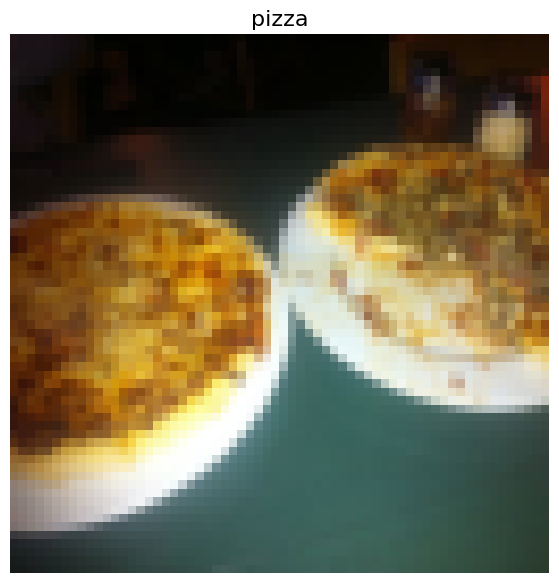

In [49]:
plt.figure(figsize=(10,7))
plt.imshow(images_permute)
plt.axis("off")
plt.title(class_name[labels],fontsize=16)

#Step 4: Creating the DataLoader:

In [53]:
Train_data_Loader=DataLoader(dataset=train_data,
                             batch_size=1,
                             shuffle=True,
                             num_workers=os.cpu_count())
Test_data_Loader=DataLoader(dataset=test_data,
                            batch_size=1,
                            shuffle=False,
                            num_workers=os.cpu_count())
print(f"Number of Train DataLoader:{len(Train_data_Loader)} of size 32")
print(f"Number of Test DataLoader:{len(Test_data_Loader)} of size 32")

Number of Train DataLoader:225 of size 32
Number of Test DataLoader:75 of size 32


#**What if we don't have torch.datasets.ImageFolder then what???**

In [54]:
#creating our own dataloading function like ImageFolder:
#1.Want to be able to load images from the file.
#2.Want to able to get class names from the Dataset
#3.Want to be able to get clases as Dictinary from the Dataset.

#pros:
#1.Can create a dataset from almost Everything.
#2.Not limited to pytorch in-built Datasets function.

#cons:
#1.We have to write Code.
#2.Able to bulid dataset from anything Doesn't mean that it will work.